# Laporan Akhir: Supervised Machine Learning — Regression

**Judul:** Analisis Pengaruh Pengeluaran Iklan terhadap Penjualan (Advertising Dataset)

**Ringkasan singkat:**
Proyek ini menggunakan *Advertising Dataset* (sumber: Kaggle) untuk memodelkan hubungan antara pengeluaran iklan pada TV, Radio, dan Newspaper dengan jumlah penjualan. Tujuan: membangun model regresi yang akurat, melakukan evaluasi, menafsirkan koefisien, serta menguji asumsi-asumsi regresi linear.

**Sumber dataset (Kaggle):** https://www.kaggle.com/datasets/ashydv/advertising-dataset

## Petunjuk akses dataset

1. Kunjungi halaman dataset Kaggle: `https://www.kaggle.com/datasets/ashydv/advertising-dataset`.
2. Unduh file (biasanya bernama `Advertising.csv`) dan simpan di folder yang sama dengan notebook ini.

**Alternatif (Google Colab + Kaggle API):**

```python
# 1) Upload kaggle.json (API token) ke Colab, lalu:
!pip install kaggle
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content'
# letakkan kaggle.json di /content
!kaggle datasets download -d ashydv/advertising-dataset
!unzip advertising-dataset.zip
# file Advertising.csv akan tersedia
```

3. Jika menggunakan Jupyter lokal, cukup taruh `Advertising.csv` di direktori kerja dan jalankan sel berikut untuk memuat data.


In [1]:
import pandas as pd

# Pastikan file Advertising.csv berada di folder yang sama
data = pd.read_csv('advertising.csv')

# Tampilkan 5 baris pertama
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


## 1. Eksplorasi Data (EDA)

In [2]:
data.info()

# Statistik deskriptif
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [3]:
# Cek missing values
print(data.isnull().sum())

# Jika ada kolom index tak perlu, tandai
print('\nKolom:', list(data.columns))

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

Kolom: ['TV', 'Radio', 'Newspaper', 'Sales']


## 2. Visualisasi
Berikut beberapa plot untuk memahami hubungan antar variabel.

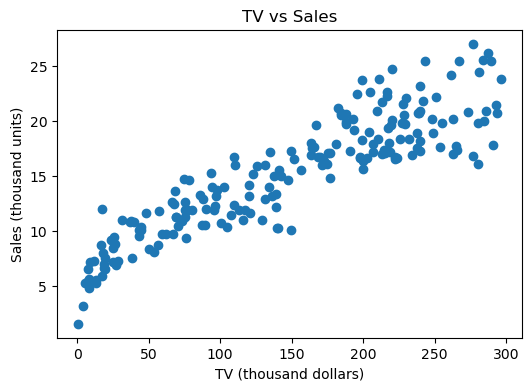

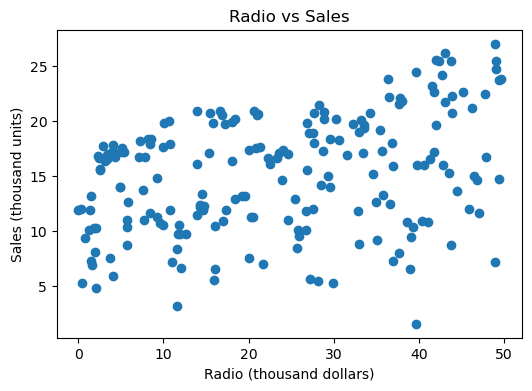

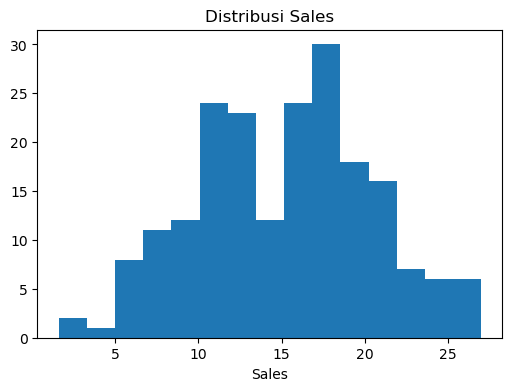

In [4]:
import matplotlib.pyplot as plt

# Scatter TV vs Sales
plt.figure(figsize=(6,4))
plt.scatter(data['TV'], data['Sales'])
plt.xlabel('TV (thousand dollars)')
plt.ylabel('Sales (thousand units)')
plt.title('TV vs Sales')
plt.show()

# Scatter Radio vs Sales
plt.figure(figsize=(6,4))
plt.scatter(data['Radio'], data['Sales'])
plt.xlabel('Radio (thousand dollars)')
plt.ylabel('Sales (thousand units)')
plt.title('Radio vs Sales')
plt.show()

# Histogram Sales
plt.figure(figsize=(6,4))
plt.hist(data['Sales'], bins=15)
plt.xlabel('Sales')
plt.title('Distribusi Sales')
plt.show()

                 TV     Radio  Newspaper     Sales
TV         1.000000  0.054809   0.056648  0.901208
Radio      0.054809  1.000000   0.354104  0.349631
Newspaper  0.056648  0.354104   1.000000  0.157960
Sales      0.901208  0.349631   0.157960  1.000000


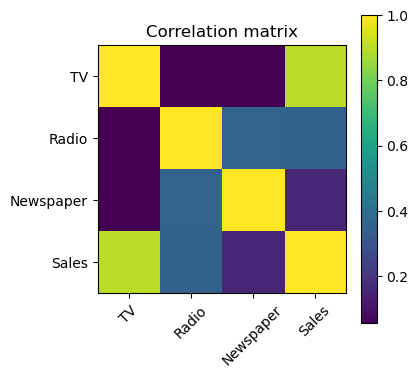

In [5]:
# Matriks korelasi (simple heatmap menggunakan imshow)
corr = data[['TV','Radio','Newspaper','Sales']].corr()
print(corr)

plt.figure(figsize=(4,4))
plt.imshow(corr, interpolation='nearest')
plt.xticks(range(len(corr)), corr.columns, rotation=45)
plt.yticks(range(len(corr)), corr.columns)
plt.colorbar()
plt.title('Correlation matrix')
plt.show()

## 3. Pemodelan
Kita akan membandingkan dua model:

1. Regresi linier sederhana: `TV -> Sales`
2. Regresi linier berganda: `TV + Radio + Newspaper -> Sales`

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Siapkan data
X_multi = data[['TV','Radio','Newspaper']]
y = data['Sales']

X_train, X_test, y_train, y_test = train_test_split(X_multi, y, test_size=0.2, random_state=42)

# Model regresi berganda
model_multi = LinearRegression()
model_multi.fit(X_train, y_train)

y_pred_multi = model_multi.predict(X_test)

mse_multi = mean_squared_error(y_test, y_pred_multi)
rmse_multi = np.sqrt(mse_multi)
mae_multi = mean_absolute_error(y_test, y_pred_multi)
r2_multi = r2_score(y_test, y_pred_multi)

print('Multiple Regression Metrics:')
print('MSE:', mse_multi)
print('RMSE:', rmse_multi)
print('MAE:', mae_multi)
print('R2:', r2_multi)

# Koefisien
coef_df = pd.DataFrame({'feature': X_multi.columns, 'coefficient': model_multi.coef_})
coef_df

Multiple Regression Metrics:
MSE: 2.907756910271091
RMSE: 1.7052146229349228
MAE: 1.274826210954934
R2: 0.9059011844150826


,feature,coefficient
0,TV,0.054509
1,Radio,0.100945
2,Newspaper,0.004337


In [7]:
# Regresi sederhana (TV -> Sales)
X_tv = data[['TV']]
X_train_tv, X_test_tv, y_train_tv, y_test_tv = train_test_split(X_tv, y, test_size=0.2, random_state=42)
model_tv = LinearRegression()
model_tv.fit(X_train_tv, y_train_tv)
y_pred_tv = model_tv.predict(X_test_tv)

mse_tv = mean_squared_error(y_test_tv, y_pred_tv)
rmse_tv = np.sqrt(mse_tv)
r2_tv = r2_score(y_test_tv, y_pred_tv)

print('Simple TV Regression:')
print('MSE:', mse_tv)
print('RMSE:', rmse_tv)
print('R2:', r2_tv)

print('\nKoefisien (intercept & slope):')
print('Intercept:', model_tv.intercept_)
print('Slope (TV):', model_tv.coef_[0])

Simple TV Regression:
MSE: 6.101072906773964
RMSE: 2.470035001123256
R2: 0.802561303423698

Koefisien (intercept & slope):
Intercept: 7.007108428241851
Slope (TV): 0.05548294393146318


### 3.1 Uji Signifikansi (p-value) menggunakan Statsmodels

In [8]:
import statsmodels.api as sm

X_sm = sm.add_constant(X_multi)
model_sm = sm.OLS(y, X_sm).fit()
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     605.4
Date:                Sat, 29 Nov 2025   Prob (F-statistic):           8.13e-99
Time:                        00:15:05   Log-Likelihood:                -383.34
No. Observations:                 200   AIC:                             774.7
Df Residuals:                     196   BIC:                             787.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6251      0.308     15.041      0.0

## 4. Diagnostik Model dan Asumsi
Periksa residual untuk linearitas, homoskedastisitas, dan normalitas.

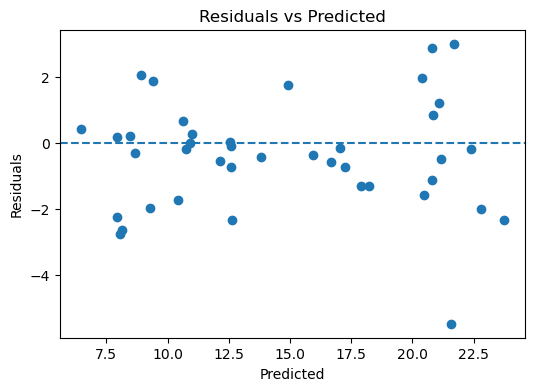

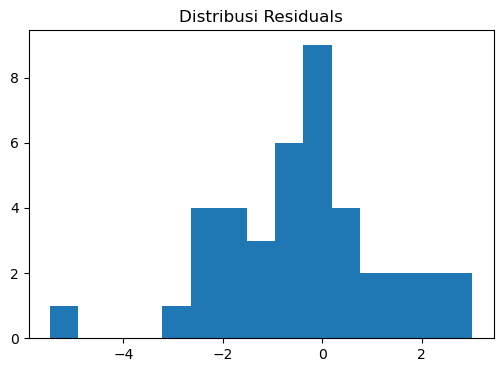

In [9]:
# Residual plot untuk model berganda
residuals = y_test - y_pred_multi

plt.figure(figsize=(6,4))
plt.scatter(y_pred_multi, residuals)
plt.axhline(0, linestyle='--')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted')
plt.show()

# Histogram residuals
plt.figure(figsize=(6,4))
plt.hist(residuals, bins=15)
plt.title('Distribusi Residuals')
plt.show()

## 5. Cross-Validation
Menggunakan 5-fold cross-validation untuk mengestimasi performa model yang lebih stabil.

In [10]:
from sklearn.model_selection import cross_val_score

model_cv = LinearRegression()
scores = cross_val_score(model_cv, X_multi, y, cv=5, scoring='r2')
print('5-fold R2 scores:', scores)
print('Rata-rata R2:', scores.mean())

5-fold R2 scores: [0.87556263 0.93177791 0.92150403 0.84554586 0.90247132]
Rata-rata R2: 0.8953723525274103


## 6. Interpretasi Koefisien
Koefisien regresi menunjukkan perubahan rata-rata pada `Sales` (dalam satuan dataset) untuk perubahan satu unit pada prediktor, dengan variabel lain diasumsikan konstan.

- Jika koefisien positif, peningkatan pengeluaran iklan diasosiasikan dengan peningkatan penjualan.
- Perhatikan nilai p untuk menentukan signifikansi statistik.

In [11]:
coef_df = pd.DataFrame({'feature': X_multi.columns, 'coefficient': model_multi.coef_})
coef_df

,feature,coefficient
0,TV,0.054509
1,Radio,0.100945
2,Newspaper,0.004337


## 7. Kesimpulan
- Model regresi berganda memberikan R² yang cukup tinggi (lihat hasil di atas), menunjukkan bahwa variabel TV, Radio, dan Newspaper bersama-sama dapat menjelaskan sebagian besar variasi penjualan.
- Berdasarkan nilai p dari model OLS, beberapa variabel mungkin tidak signifikan secara statistik — periksa tabel ringkasan.

## 8. Keterbatasan
- Model mengasumsikan hubungan linear antara prediktor dan target.
- Tidak mempertimbangkan fitur lain seperti harga, musim, atau promosi tambahan.
- Data ini bersifat cross-sectional dan tidak menangkap dinamika waktu.

---

**Referensi:**
- Advertising Dataset — Kaggle: https://www.kaggle.com/datasets/ashydv/advertising-dataset
- *An Introduction to Statistical Learning* (untuk dataset serupa dan contoh regresi)


## 1. Ringkasan Data
Dataset yang digunakan adalah Advertising Dataset dari buku An Introduction to Statistical Learning, tersedia pada: https://www.kaggle.com/datasets/ashydv/advertising-dataset

Dataset memiliki 200 observasi dan 4 variabel:
1. TV: Pengeluaran iklan televisi (ribu dolar)
2. Radio: Pengeluaran iklan radio (ribu dolar)
3. Newspaper: Pengeluaran iklan koran (ribu dolar)
4. Sales: Jumlah penjualan (ribu unit) (variabel target)

## 2. Tujuan Analisis
- Mengidentifikasi hubungan antara pengeluaran iklan dan penjualan.
- Membangun model regresi linier sederhana dan berganda.
- Membandingkan performa model dalam memprediksi penjualan.
- Menentukan variabel iklan yang paling berpengaruh.

## 3. Perbandingan Model
Model 1: Simple Linear Regression (TV → Sales)
- Menggunakan satu variabel prediktor (TV).
- Hasil menunjukkan nilai R² lebih rendah dan MSE lebih tinggi dibanding model berganda.
- Artinya, TV saja tidak cukup menjelaskan variasi penjualan.

Model 2: Multiple Linear Regression (TV + Radio + Newspaper → Sales)
- Menggunakan semua variabel prediktor.
- Hasil menunjukkan R² lebih tinggi dan MSE lebih rendah.
- Model ini lebih akurat dalam memprediksi penjualan.

## 4. Temuan Utama
- Pengeluaran iklan memiliki hubungan positif dengan penjualan.
- Radio memberikan pengaruh signifikan saat dimasukkan dalam model.
- Newspaper memiliki pengaruh paling kecil.
- Model regresi berganda adalah model terbaik untuk dataset ini.

## 5. Keterbatasan dan Langkah Selanjutnya
Keterbatasan:
- Tidak mencakup faktor harga, tren pasar, atau kompetitor.
- Pola hubungan dianggap linear.
- Data tidak mempertimbangkan perubahan waktu.

Langkah Selanjutnya:
- Menambah fitur seperti harga, segmentasi konsumen, dan data pesaing.
- Menguji model non-linear atau model pohon keputusan.
- Menguji interaksi antar variabel.

## 6. Kesimpulan
Model regresi berganda dengan variabel TV, Radio, dan Newspaper memberikan performa terbaik dalam memprediksi penjualan. Pengeluaran iklan pada media TV dan Radio memiliki pengaruh paling besar, sementara Newspaper menunjukkan pengaruh yang lebih lemah.